In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)
data = imagenes.reshape((n_imagenes, -1)) 

data_train, x_val, ytrain, y_val = train_test_split(data, target, train_size=0.8)
x_train, x_test, y_train, y_test = train_test_split(data_train, ytrain, train_size=0.5)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [16]:
cov = np.cov(x_train.T)
valores, vectores = np.linalg.eig(cov)
valores = np.real(valores)
vectores = np.real(vectores)
ii = np.argsort(-valores)
valores = valores[ii]
vectores = vectores[:,ii]

x_train = x_train @ vectores
x_test = x_test @ vectores
x_val = x_val @ vectores
x_train = x_train[:,:10]
x_test = x_test[:,:10]
x_val = x_val[:,:10]

In [20]:
c = np.logspace(-2,2,1000)
score = []
for i in c:
    svc = SVC(C=i, kernel = 'linear')
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    score.append(f1_score(y_test, y_pred, average = 'macro', labels = np.arange(10)))

score = np.array(score)
ii = np.argmax(score)
c_max = c[ii]

svc = SVC(C = c_max, kernel = 'linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
cm = confusion_matrix(y_val, y_pred, labels = np.arange(10))

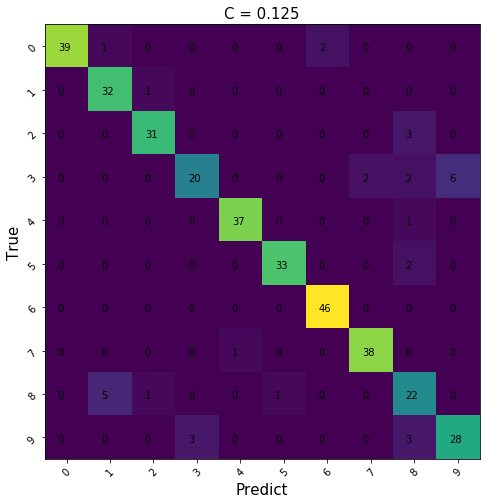

In [22]:
plt.figure(figsize = (8,8))
plt.imshow(cm)
tick_marks = np.arange(10)
classNames = ['0','1','2','3','4','5','6','7','8','9']
plt.title(r'C = %0.3f' %c_max, fontsize=15)
plt.ylabel('True', fontsize = 15)
plt.xlabel('Predict', fontsize = 15)
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames, rotation = 45)
for i in range(10):
    for j in range(10):
        plt.text(j-0.2, i+0.1, str(cm[i][j]))
#plt.savefig('matrix_confusion.png')
plt.show()